In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
businesses = pd.read_csv('data/businesses_pa.csv', header=None)

In [3]:
businesses.columns = [
    'business_id',
    'name',
    'latitude',
    'longitude',
    'stars',
    'review_count',
    'categories',
    'accepts_credit_cards',
    'monday',
    'tuesday',
    'wednesday',
    'thursday',
    'friday',
    'saturday',
    'bike_parking',
    'price_range',
    'take_out',
    'delivery',
    'tv',
    'seats_reservations',
    'sunday',
    'alcohol',
    'noise_level'
    'parking'
]

In [4]:
businesses

,business_id,name,latitude,longitude,stars,review_count,categories,accepts_credit_cards,monday,tuesday,...,saturday,bike_parking,price_range,take_out,delivery,tv,seats_reservations,sunday,alcohol,noise_levelparking
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",False,7:0-20:0,7:0-20:0,...,7:0-21:0,1,True,False,False,NaN,7:0-21:0,none,NaN,True
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,40.338183,-75.471659,4.5,13,"Brewpubs, Breweries, Food",True,NaN,NaN,...,12:0-22:0,NaN,True,NaN,NaN,NaN,12:0-18:0,NaN,NaN,True
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,39.953949,-75.143226,4.0,245,"Sushi Bars, Restaurants, Japanese",True,NaN,13:30-22:0,...,13:30-23:0,2,True,True,True,True,13:30-22:0,full_bar,average,True
3,ROeacJQwBeh05Rqg7F6TCg,BAP,39.943223,-75.162568,4.5,205,"Korean, Restaurants",True,11:30-20:30,11:30-20:30,...,11:30-20:30,1,True,None,None,False,NaN,none,quiet,True
4,QdN72BWoyFypdGJhhI5r7g,Bar One,39.939825,-75.157447,4.0,65,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",True,16:0-0:0,16:0-0:0,...,11:0-2:0,2,True,True,False,False,11:0-0:0,full_bar,average,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,40.060414,-75.191084,4.0,21,"Sandwiches, Restaurants, Italian",True,7:0-17:0,7:0-17:0,...,8:0-17:0,1,True,False,True,False,8:0-17:0,none,quiet,False
15826,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,40.032483,-75.214430,3.0,55,"Restaurants, Specialty Food, Food, Sandwiches,...",True,10:0-21:0,10:0-21:0,...,10:0-16:0,2,True,True,False,False,10:0-19:0,none,average,True
15827,8n93L-ilMAsvwUatarykSg,Kitchen Gia,39.951018,-75.198240,3.0,22,"Coffee & Tea, Food, Sandwiches, American (Trad...",True,9:0-19:30,9:0-19:30,...,11:0-17:0,2,True,True,True,False,11:0-19:30,none,average,False
15828,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,39.925656,-75.310344,3.0,11,"Restaurants, Sandwiches, Convenience Stores, C...",True,0:0-0:0,0:0-0:0,...,0:0-0:0,1,True,True,NaN,NaN,0:0-0:0,NaN,NaN,True


In [5]:
gdf = gpd.GeoDataFrame(
    businesses, geometry=gpd.points_from_xy(y=businesses['latitude'], x=businesses['longitude']), crs="EPSG:4326"
)

In [6]:
gdf[gdf['stars'] == 3]['geometry']

5        POINT (-75.21831 40.02247)
10       POINT (-75.60360 39.96154)
13       POINT (-75.19489 39.95457)
14       POINT (-75.30603 40.14907)
15       POINT (-75.16803 39.96308)
                    ...            
15817    POINT (-75.18992 39.95745)
15822    POINT (-75.03575 40.34628)
15826    POINT (-75.21443 40.03248)
15827    POINT (-75.19824 39.95102)
15828    POINT (-75.31034 39.92566)
Name: geometry, Length: 2404, dtype: geometry

In [7]:
for i, j in zip(range(3), range(3)):
    print(i, j)

0 0
1 1
2 2


(1.0, (0, 0))
(1.5, (0, 1))
(2.0, (0, 2))
(2.5, (1, 0))
(3.0, (1, 1))
(3.5, (1, 2))
(4.0, (2, 0))
(4.5, (2, 1))
(5.0, (2, 2))


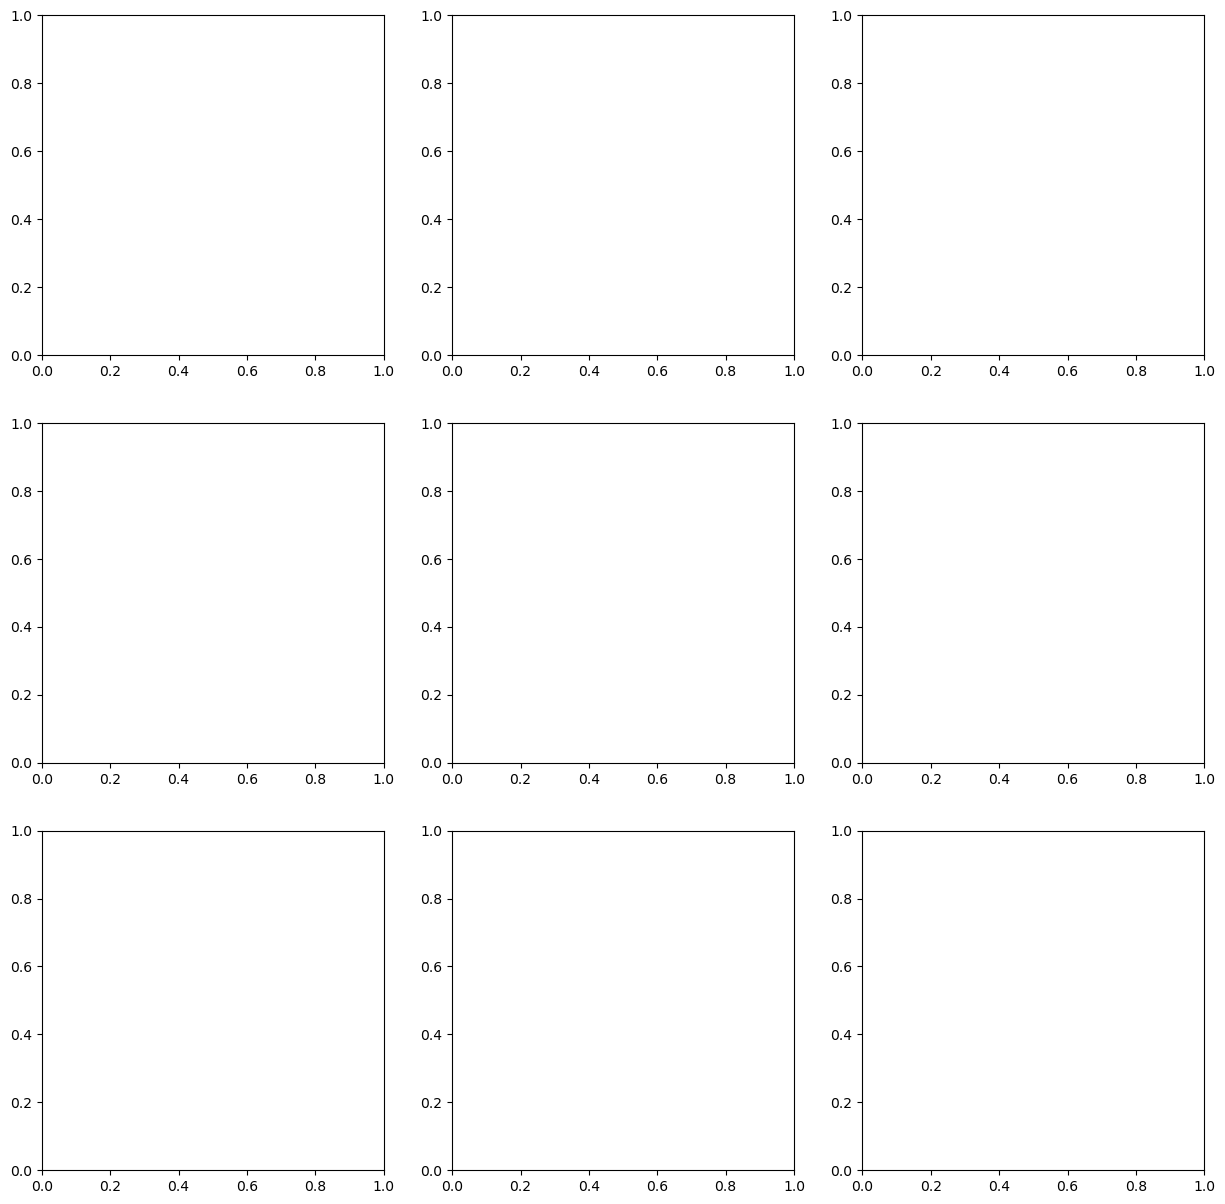

In [31]:
import itertools

fig, ax = plt.subplots(height, width, figsize=(15,15))

stars = sorted(gdf.stars.unique())

height, width = (3, 3)

index = zip(stars, (itertools.product(range(3), repeat=2)))

for idx in index:
    gdf[gdf['stars'] == idx[0]]['geometry'].plot(ax=ax[idx[1][0],idx[1][1]])


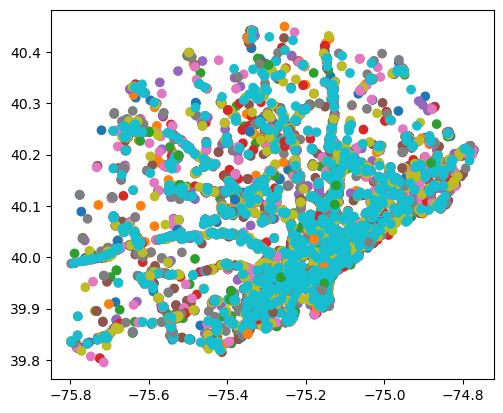

In [100]:
gdf.plot(gdf['geometry']);

In [13]:
df = gpd.read_file('data/tl_2022_us_state/tl_2022_us_state.shp')
df = df.to_crs("EPSG:4326")

<Axes: >

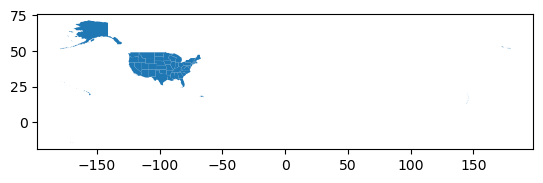

In [24]:
df.plot()

In [33]:
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = df
for n in non_continental:
    us49 = us49[us49.stusps != n]

In [ ]:
us49

In [18]:
df.columns = df.columns.str.lower()

In [53]:
pennsylvania = df[df['name'] == 'Pennsylvania']

<Axes: >

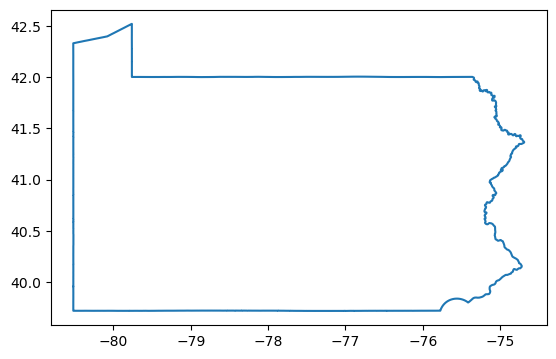

In [86]:
pennsylvania.boundary.plot()

<Axes: >

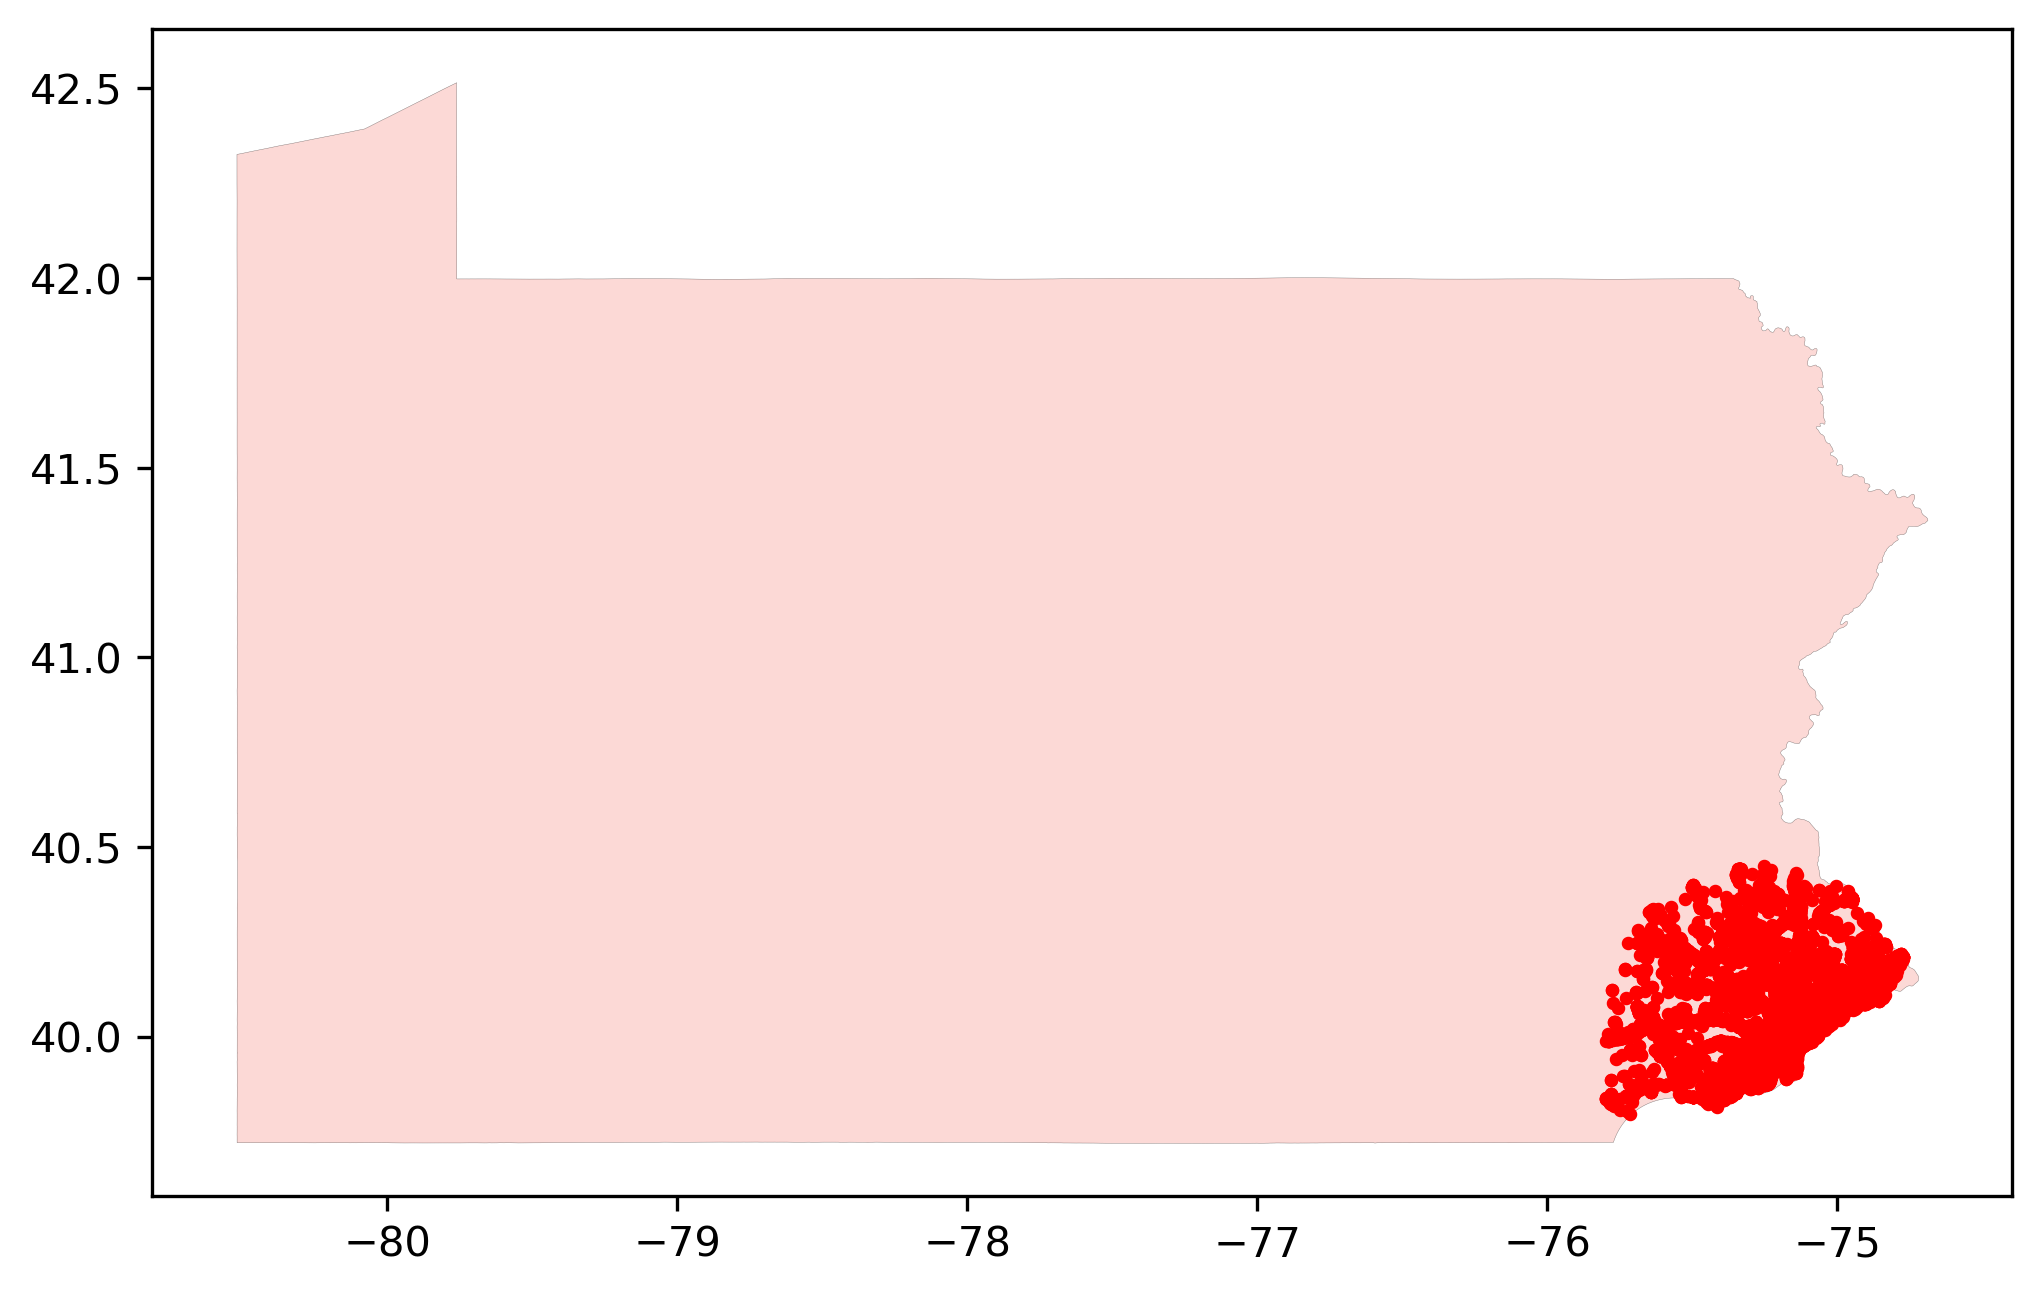

In [59]:
f, ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)

pennsylvania.plot(ax=ax, alpha=0.5, cmap='Pastel1', edgecolor='k', legend=True, linewidth=0.1)

gdf['geometry'].plot(ax=ax, marker='o', color='red', markersize=5)

Text(0.5, 1.0, 'US Map using Contextily')

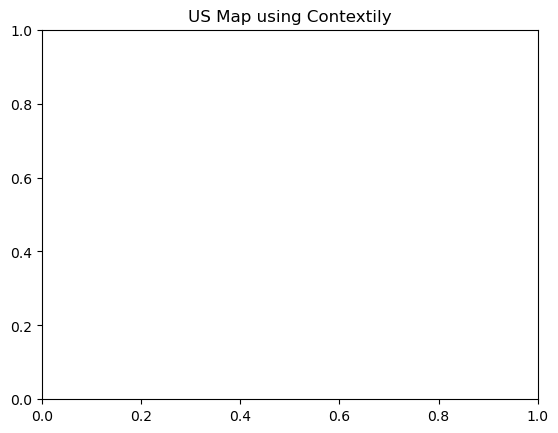

In [101]:
plt.title('US Map using Contextily',fontsize='large')